In [95]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [149]:
#Read Dataset
df = pd.read_csv('movies.csv')  #dataframe
df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [99]:
#Check for missing Data
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [101]:
#Removing Missing vales
df = df.dropna()

In [103]:
# Checking Data Types of all columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [105]:
#Changing the Budget's and Gross's datatype for better readability
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [107]:
#Some rows don't have matching year in year and released columns, that's fized and a new column is created for that.
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [109]:
#sorting the dataset in terms of gross (ascending)
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [111]:
df['gross'] = df['gross'].astype('Int64')  

# To display the first few rows
print(df['gross'].head())

5445    2847246203
7445    2797501328
3045    2201647264
6663    2069521700
7244    2048359754
Name: gross, dtype: Int64


In [113]:
#Why not take a look at the full data?
pd.set_option('display.max_rows', None)

In [165]:
#Check for duplicates and drop them
df['company'].sort_values(ascending=False) #This showed whether there are duplicates or no

#Remove Duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

df[].head(10)

7129    2384
5664    2383
6412    2382
4007    2381
6793    2380
6420    2379
3776    2378
524     2377
3330    2376
146     2375
2213    2374
6222    2373
3368    2372
535     2371
5180    2370
3193    2369
1321    2368
1329    2367
789     2366
5125    2365
5499    2364
4618    2363
4990    2362
5410    2361
7576    2360
3310    2359
6798    2358
6265    2357
4392    2356
4999    2355
425     2354
712     2353
3158    2352
3637    2351
2173    2350
4272    2349
450     2348
3624    2347
3943    2346
2084    2345
818     2344
2355    2343
6606    2342
5276    2341
7032    2340
4863    2339
2194    2338
4572    2337
6616    2336
1306    2335
1475    2334
5715    2333
1421    2332
1744    2331
1304    2330
7225    2329
5496    2328
6672    2327
5395    2326
4557    2325
4505    2324
7267    2323
2284    2322
6578    2321
317     2320
0       2319
7401    2318
40      2317
403     2316
117     2315
5075    2314
729     2313
4975    2312
6166    2311
5272    2310
5409    2309
7625    2308

In [ ]:
# My Guess (Just on the basis of common knowledge, will test them ofc): 
# Budget - High Correlation with Gross
# Company - High Correlation with Gross

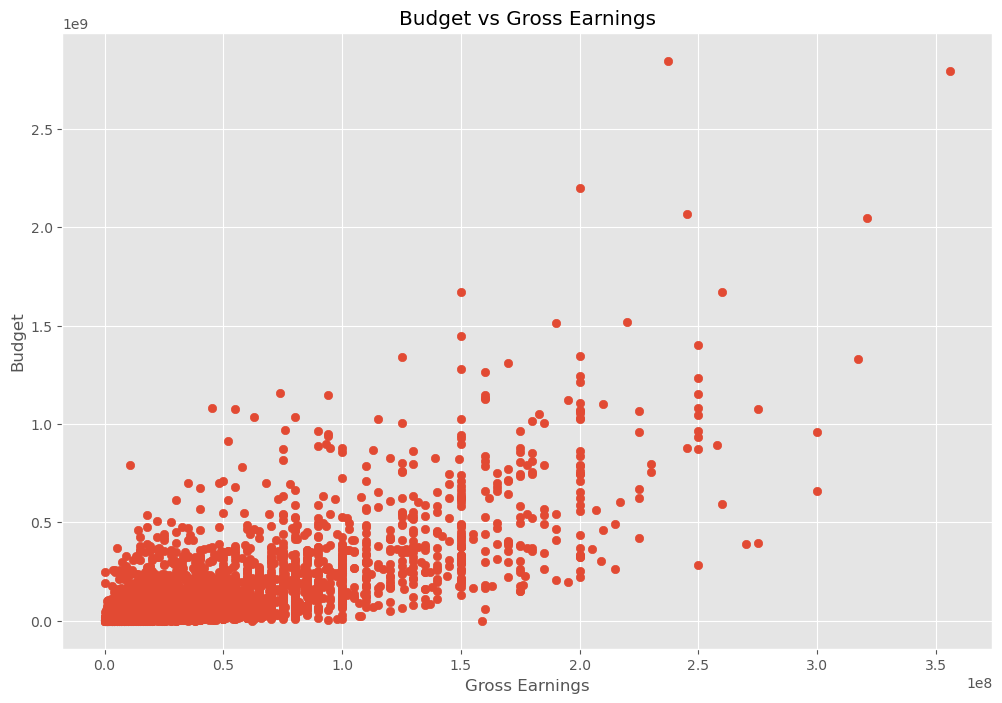

In [119]:
#Scatter Plot - Budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
plt.show()

In [121]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


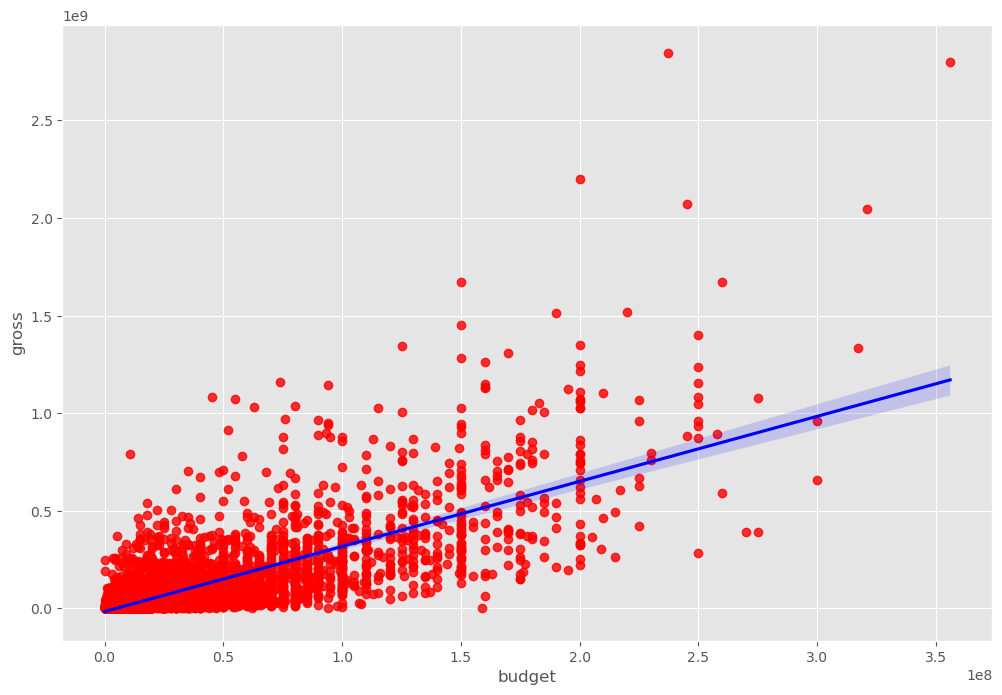

In [123]:
# To check out correlation for a fact, we will be going with "Regression Plot" using
# seaborn...

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.show()

#Still not sure how correlated they are...

In [125]:
#Looking at Correlation
#As correlation can only be found between numeric columns, we will exclude rest string ones
df.select_dtypes(include=['int64', 'float64']).corr(method='pearson')   #correlation method: Pearson

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [127]:
#Correlation Method: Kendall
df.select_dtypes(include=['int64', 'float64']).corr(method='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.039389,0.296512,0.220833,0.239539,0.064824
score,0.039389,1.000000,0.350185,-0.006406,0.124943,0.292254
votes,0.296512,0.350185,1.000000,0.346274,0.553625,0.205344
budget,0.220833,-0.006406,0.346274,1.000000,0.512057,0.231278
gross,0.239539,0.124943,0.553625,0.512057,1.000000,0.176979
runtime,0.064824,0.292254,0.205344,0.231278,0.176979,1.000000


In [129]:
#Correlation Method: spearman
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr(method='spearman')
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.057741,0.427623,0.312886,0.351045,0.095444
score,0.057741,1.000000,0.495409,-0.009971,0.183192,0.412155
votes,0.427623,0.495409,1.000000,0.493461,0.745793,0.300621
budget,0.312886,-0.009971,0.493461,1.000000,0.692958,0.330794
gross,0.351045,0.183192,0.745793,0.692958,1.000000,0.257400
runtime,0.095444,0.412155,0.300621,0.330794,0.257400,1.000000


In [ ]:
#So as we guessed, there is HIGH CORRELATION between Gross and Budget

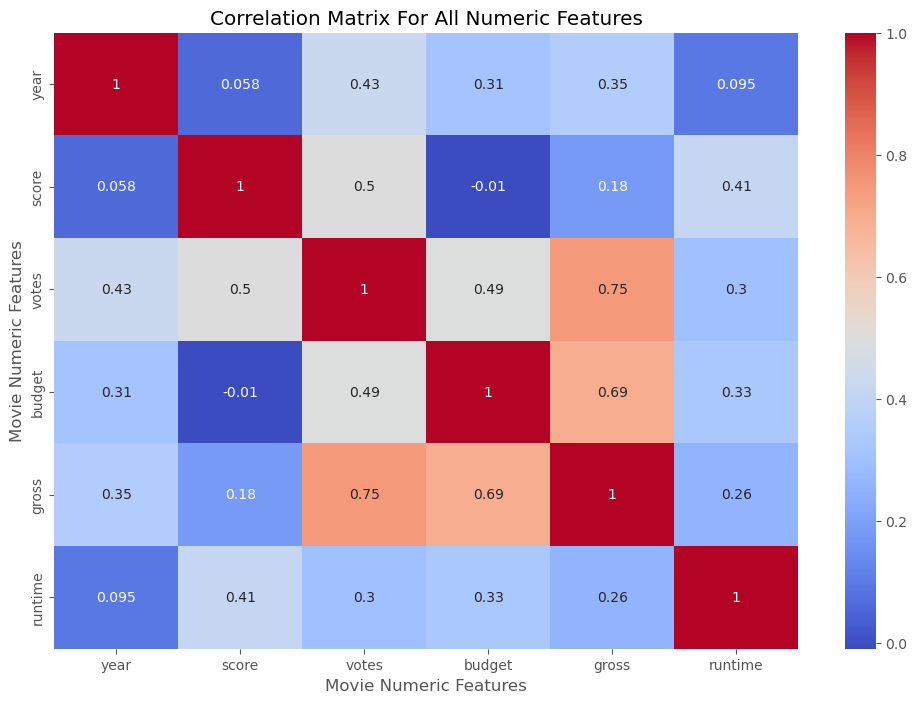

In [131]:
#Heatmap - A better statistical way to look at corresponding correlations

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix For All Numeric Features')
plt.xlabel('Movie Numeric Features')
plt.ylabel('Movie Numeric Features')
plt.show()

In [ ]:
# So we did see that the column/variable budget was highly correlated with Gross. 
#But budget is highly correlated to gross of all the other numeric columns
#What about the columns with strings in them?
#Let's take a look at them!!

In [155]:
#We are gonna give each company name a numeric label
df_numerized = df
for col_num in df_numerized.columns:
    if (df_numerized[col_num].dtype == 'object'):
        df_numerized[col_num] = df_numerized[col_num].astype('category')
        df_numerized[col_num] = df_numerized[col_num].cat.codes  #.cat.codes - converts categories into numerical codes (e.g., a=0, b=1, c=2).
df_numerized.head(100)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0
5,2109,6,10,1980,2502,6.4,123000.0,2528,4362,241,55,550000.0,39754601.0,1812,95.0
6,5574,6,0,1980,1771,7.9,188000.0,1412,838,1277,55,27000000.0,115229890.0,2281,133.0
7,4436,6,3,1980,699,8.2,330000.0,1829,1769,2240,55,18000000.0,23402427.0,631,129.0
8,5281,4,0,1980,1753,6.8,101000.0,2306,1979,877,55,54000000.0,108185706.0,883,127.0
9,6213,6,3,1980,2286,7.0,10000.0,2864,423,589,55,10000000.0,15795189.0,2272,100.0


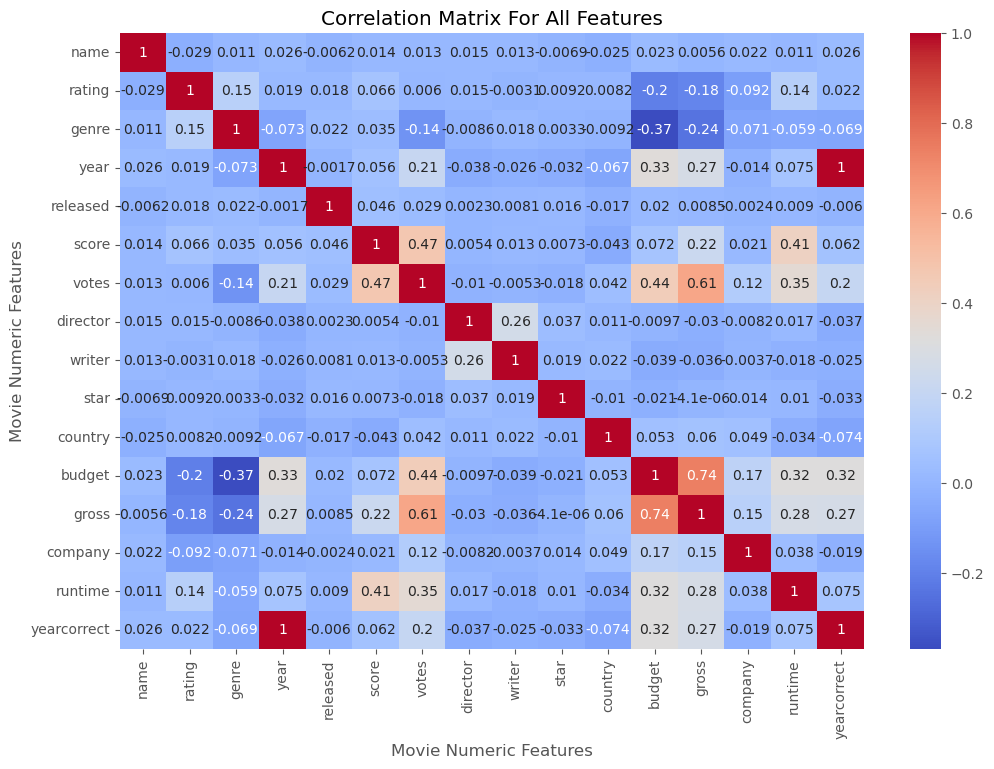

In [135]:
#Now lets create a heatmap to see how correlated are the non-numeric columns/variables

corr_matrix = df_numerized.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix For All Features')
plt.xlabel('Movie Numeric Features')
plt.ylabel('Movie Numeric Features')
plt.show()


In [ ]:
#Good! we can see clearly what variables or highly correlated to Gross - Votes & Budget

In [ ]:
#How about visualize in such a way that first thing you see is the most highly correlated variable, then goes down the order

In [159]:
#Unstacking. Each variable separate and its corresponding correlations with rest shown here.
correlation_matrix = df_numerized.corr()

correlation_pairs = correlation_matrix.unstack()
correlation_pairs

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.023970
          gross       0.005533
          company     0.009211
          runtime     0.010392
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.176002
          gross      -0.107339
          company    -0.032943
          runtime     0.062145
genre     name        0.016355
          rating      0.072423
        

In [161]:
#Gotta Sort for better visualization!
sorted_pairs = correlation_pairs.sort_values()
sorted_pairs

budget    genre      -0.356564
genre     budget     -0.356564
          gross      -0.235650
gross     genre      -0.235650
rating    budget     -0.176002
budget    rating     -0.176002
genre     votes      -0.145307
votes     genre      -0.145307
score     country    -0.133348
country   score      -0.133348
gross     rating     -0.107339
rating    gross      -0.107339
year      genre      -0.081261
genre     year       -0.081261
country   runtime    -0.078412
runtime   country    -0.078412
company   genre      -0.071067
genre     company    -0.071067
year      country    -0.070938
country   year       -0.070938
runtime   genre      -0.052711
genre     runtime    -0.052711
writer    budget     -0.039451
budget    writer     -0.039451
genre     country    -0.037615
country   genre      -0.037615
company   rating     -0.032943
rating    company    -0.032943
star      year       -0.027242
year      star       -0.027242
writer    gross      -0.023519
gross     writer     -0.023519
year    

In [163]:
high_correlation = sorted_pairs[(sorted_pairs) > 0.5]
high_correlation

gross     votes       0.630757
votes     gross       0.630757
budget    gross       0.740395
gross     budget      0.740395
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
##### Conclusion: Budget & Votes are HIGHLY CORRELATED with Gross  ######